In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def activation(x, type, derivative=False):

  if type == 'sigmoid':
    if derivative:
      sig = 1 / (1 + np.exp(-x))
      return sig * (1 - sig)
    return 1 / (1 + np.exp(-x))

  elif type == 'tanh':
      if derivative:
        tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
        return 1 - tanh**2
      return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

  elif type == 'ReLU':
   if derivative:
    return np.where(x > 0, 1, 0)
   return np.maximum(0, x)

In [68]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [69]:
class Neural_Network():


  def __init__(self,input_nodes,layers,output_nodes):
    self.input_nodes = input_nodes  #dimension of the input vector
    self.layers = layers   #number of layers that we want in netork
    self.output_nodes = output_nodes  #number of output classes

    #convert to small_named variables for comfort
    self.n = self.input_nodes
    self.L = self.layers
    self.k = self.output_nodes

    self.W = []  # W will be a list of matrices of size nxn --> n = dimension of input vector
    self.B = []  # B will be a list of matrices of size 1xn

    #weights & biases initialisation for layers 1 to L-1
    for i in range(0, self.L-1):
        W_i = np.random.rand(self.n, self.n)/np.sqrt(self.n) # creating nxn matrix
        B_i = np.random.rand(1, self.n)  # creating 1xn matrix
        self.W.append(W_i)
        self.B.append(B_i)

    #weights & biases initialisation for last layer
    W_i = np.random.rand(self.n,self.k)/np.sqrt(self.n) # creating nxk matrix
    B_i = np.random.rand(1,self.k) # creating 1xk matrix
    self.W.append(W_i)
    self.B.append(B_i)

  def forward(self,X):
    Y_hat = []
    # Initializing lists A and H depending on the number of layers
    A = [[] for _ in range(self.layers)]
    H = [[] for _ in range(self.layers)]

    for x in X:


      #input layer
      a0 = np.dot(self.W[0],x.T)  + self.B[0].T   #a1 = W1.x + b1
      A[0].append(a0)
      h0 = activation(a0,type='sigmoid')  #h1 = activation(a1)
      H[0].append(h0)

      #middle layers
      for i in range(1,self.L-1):
          # Accessing the value in H[i-1] corresponding to the current x
          h_prev = H[i - 1][-1]  # Getting the last element added to H[i-1]
          a = np.dot(self.W[i], h_prev) + self.B[i].T  # a = Wi.h(i-1) + Bi
          A[i].append(a)
          h = activation(a, type='sigmoid')
          H[i].append(h)

      #output layer
      a_L = np.dot(self.W[self.L-1].T,H[self.L-2][-1]) + self.B[self.L-1].T
      A[self.L-1].append(a_L)
      y_hat = softmax(a_L)
      Y_hat.append(y_hat)

    return Y_hat, A, H    #each y_hat is a kx1 matrix



  def backward(self,X,Y,lr,max_iter):
    errors = []

    for i in range(max_iter):
      print(f"Iteration: {i}")
      dW = []
      dB = []
      dA = [[] for _ in range(self.layers)]
      dH = [[] for _ in range(self.layers)]

      for i in range(0, self.L-1):
        dW_i = np.zeros((self.n, self.n))  # creating nxn matrix
        dB_i = np.zeros((1, self.n))  # creating 1xn matrix
        dW.append(dW_i)
        dB.append(dB_i)

      dW_i = np.zeros((self.n, self.k))  # creating nxk matrix for last layer
      dB_i = np.zeros((1, self.k))  # creating 1xk matrix for last layer
      dW.append(dW_i)
      dB.append(dB_i)

      Y_hat, A, H  = self.forward(X)

      for x, y, y_hat in zip(X, Y, Y_hat):

        #backpropagating through output layer
        grad_A_L_minus_1 = (y_hat - y)
        dA[self.L-1].append(grad_A_L_minus_1)

        #backpropagating through middle layers
        for j in range(self.L-1, 0, -1):
          # dw = np.dot(dA[j][-1], H[j-1][-1].T)
          # dw = np.dot(dA[j][-1], H[j-1][-1])
          dw = np.dot(H[j-1][-1],dA[j][-1].T)
          dW[j] += dw
          dB[j] += dA[j][-1].T
          grad_H_j_minus_1 = np.dot(self.W[j], dA[j][-1])
          dH[j-1].append(grad_H_j_minus_1)
          grad_A_j_minus_1 = grad_H_j_minus_1 * activation(A[j-1][-1], type='sigmoid', derivative=True)
          dA[j-1].append(grad_A_j_minus_1)

        #backpropagating through input layer
        dw = np.dot(grad_A_j_minus_1, x)
        dW[0] += dw
        dB[0] += grad_A_j_minus_1.T

      #updating the weights and biases
      for j in range(self.L):
        self.W[j] -= lr * dW[j]
        self.B[j] -= lr * dB[j]


      # Calculating error after each epoch
      Y = np.array(Y)
      Y_hat = np.array(Y_hat)
      loss = -Y * np.log(Y_hat)
      mean_loss = np.mean(loss)
      errors.append(mean_loss)
      print("Mean loss:", mean_loss)

    # Plotting errors vs epoch
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return self.W,self.B



In [70]:
model = Neural_Network(5, 3, 4)

In [71]:
#Checking dimensions for verification
for w in model.W:
  print(w.shape)

(5, 5)
(5, 5)
(5, 4)


In [72]:
for b in model.B:
  print(b.shape)

(1, 5)
(1, 5)
(1, 4)


In [73]:
# Defining the dimensions as per our data
m = 10  # number of data points
n = 5   # dimension of input vectors
k = 4   # dimension of output vectors

# Preparing X list with random values X = input data
X = [np.random.rand(1, n) for _ in range(m)]

# Preparing Y list with one-hot encoded vectors
Y = []
for _ in range(m):
    y = np.zeros((k, 1))
    index = np.random.randint(0, k)
    y[index, 0] = 1
    Y.append(y)



In [74]:
#checking the dimensions
for x in X:
  print(x.shape)

(1, 5)
(1, 5)
(1, 5)
(1, 5)
(1, 5)
(1, 5)
(1, 5)
(1, 5)
(1, 5)
(1, 5)


In [75]:
for y in Y:
  print(y.shape)

(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)
(4, 1)


In [76]:
# Printing X and Y for verification
print("X:")
for x in X:
    print(x)

print("\nY:")
for y in Y:
    print(y)

X:
[[0.77742541 0.22656042 0.75174604 0.54124795 0.18545851]]
[[0.41946468 0.25111953 0.81355829 0.05373892 0.99555771]]
[[0.45951869 0.3735928  0.50302072 0.0084996  0.35316853]]
[[0.14711328 0.84923127 0.4530475  0.36127415 0.47123622]]
[[0.21409702 0.95470554 0.86450057 0.22222517 0.1415354 ]]
[[0.06821006 0.26553074 0.06125729 0.43607975 0.14371319]]
[[0.46070617 0.16399499 0.92993688 0.79817366 0.79276389]]
[[0.1934771  0.79005909 0.62347408 0.52069288 0.96781564]]
[[0.34679969 0.91612992 0.57781101 0.67089412 0.59010726]]
[[0.96473718 0.67840057 0.00373979 0.047742   0.59871047]]

Y:
[[0.]
 [0.]
 [0.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [1.]]
[[0.]
 [1.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [1.]]
[[0.]
 [0.]
 [1.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [0.]]


In [77]:
Y_pred, A1, H1 = model.forward(X)
print("Y_pred:")
for y_pred in Y_pred:
    print(y_pred)

Y_pred:
[[0.24506813]
 [0.09575443]
 [0.28157939]
 [0.37759805]]
[[0.24505002]
 [0.09573774]
 [0.28163207]
 [0.37758018]]
[[0.24496917]
 [0.09618438]
 [0.28117821]
 [0.37766824]]
[[0.2450915 ]
 [0.09570403]
 [0.28161892]
 [0.37758556]]
[[0.24512176]
 [0.09566178]
 [0.2816111 ]
 [0.37760536]]
[[0.24485446]
 [0.09655812]
 [0.28091818]
 [0.37766923]]
[[0.24512702]
 [0.09537972]
 [0.28199168]
 [0.37750158]]
[[0.24517043]
 [0.09530056]
 [0.28202091]
 [0.3775081 ]]
[[0.24519312]
 [0.09527731]
 [0.28201067]
 [0.3775189 ]]
[[0.24508189]
 [0.0958205 ]
 [0.28145246]
 [0.37764516]]


In [78]:
# Converting Y and Y_hat from lists to numpy arrays
Y = np.array(Y)
Y_hat = np.array(Y_pred)

# Computing the loss using -Y * log(Y_hat)
loss = -Y * np.log(Y_hat)

# Calculating the mean loss
mean_loss = np.mean(loss)

print("Mean loss:", mean_loss)

Mean loss: 0.33906898048190265


In [79]:
for y_pred in Y_pred:
  print(np.sum(y_pred))

1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0


Iteration: 0
Mean loss: 0.33906898048190265
Iteration: 1
Mean loss: 0.32820288887477117
Iteration: 2
Mean loss: 0.31978048325751196
Iteration: 3
Mean loss: 0.3133260064433266
Iteration: 4
Mean loss: 0.3084171652139508
Iteration: 5
Mean loss: 0.30469864007510494
Iteration: 6
Mean loss: 0.3018836174517437
Iteration: 7
Mean loss: 0.29974769972745774
Iteration: 8
Mean loss: 0.2981192824941245
Iteration: 9
Mean loss: 0.296869230690893
Iteration: 10
Mean loss: 0.295901414054131
Iteration: 11
Mean loss: 0.29514474694417797
Iteration: 12
Mean loss: 0.29454683988796504
Iteration: 13
Mean loss: 0.29406910881637294
Iteration: 14
Mean loss: 0.2936830935737989
Iteration: 15
Mean loss: 0.29336772966753466
Iteration: 16
Mean loss: 0.29310734744190986
Iteration: 17
Mean loss: 0.29289021459280223
Iteration: 18
Mean loss: 0.2927074787228781
Iteration: 19
Mean loss: 0.2925524015921814
Iteration: 20
Mean loss: 0.29241980470698403
Iteration: 21
Mean loss: 0.29230566741679714
Iteration: 22
Mean loss: 0.2922

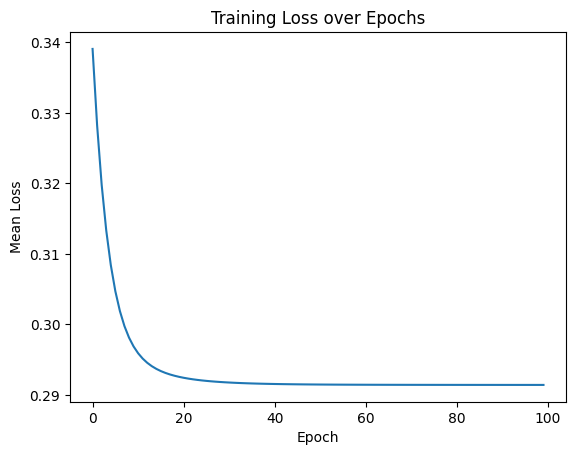

([array([[0.08285135, 0.22703369, 0.36334536, 0.2480424 , 0.16580994],
         [0.35357484, 0.08972837, 0.16193311, 0.12058107, 0.30308455],
         [0.29750997, 0.41604468, 0.13906023, 0.35371698, 0.13902405],
         [0.21223707, 0.38759708, 0.15179549, 0.08830987, 0.44578132],
         [0.02011602, 0.14726613, 0.20059082, 0.41772329, 0.282435  ]]),
  array([[0.38633039, 0.0228394 , 0.37522186, 0.30658345, 0.16427439],
         [0.44733439, 0.4425962 , 0.21618013, 0.1905355 , 0.27205532],
         [0.12126053, 0.08474766, 0.25209136, 0.21846672, 0.42951039],
         [0.35601784, 0.30643256, 0.38142673, 0.2615862 , 0.24127714],
         [0.42353995, 0.10521561, 0.4211577 , 0.2567281 , 0.0578499 ]]),
  array([[ 0.53569288,  0.1026596 ,  0.17478628,  0.35791055],
         [ 0.35950437,  0.3261671 ,  0.23903476,  0.21138561],
         [ 0.22078921,  0.03513038,  0.16356797,  0.00683717],
         [ 0.48297604,  0.29231821, -0.07378235,  0.33339071],
         [ 0.5801992 ,  0.04982692

In [80]:
lr = 0.01
max_iter = 100
model.backward(X,Y,lr,max_iter)

In [81]:
#making final prediction using trained model
pred,A1,H1 = model.forward(X)

In [82]:
print(pred)

[array([[0.49993306],
       [0.09962082],
       [0.10043678],
       [0.30000933]]), array([[0.5001112 ],
       [0.09958727],
       [0.10037933],
       [0.2999222 ]]), array([[0.49808598],
       [0.10013881],
       [0.10100829],
       [0.30076693]]), array([[0.50007698],
       [0.09955193],
       [0.10041401],
       [0.29995708]]), array([[0.50017945],
       [0.09950823],
       [0.10037769],
       [0.29993464]]), array([[0.49647316],
       [0.10059703],
       [0.10153825],
       [0.30139156]]), array([[0.50162179],
       [0.09915813],
       [0.09992812],
       [0.29929196]]), array([[0.50188967],
       [0.09905605],
       [0.09985304],
       [0.29920124]]), array([[0.50192282],
       [0.09903275],
       [0.09984414],
       [0.2992003 ]]), array([[0.49965965],
       [0.09968553],
       [0.10050902],
       [0.30014579]])]


In [83]:
# Converting Y and Y_hat from lists to numpy arrays
Y = np.array(Y)
pred = np.array(pred)

# Computing the loss using -Y * log(Y_hat)
loss = -Y * np.log(pred)

# Calculating the mean loss
mean_loss = np.mean(loss)

print("Mean loss:", mean_loss)

Mean loss: 0.2914074072619058
